In [124]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [157]:
# Reading the UNSW NB15 Dataset from the csv file
df = pd.read_csv('D:/drive/Home/Semester VII/dev/nsc/NID/UNSW_NB15.csv')

In [ ]:
# Data at a glance

df.info()
df.describe()
df.head()

In [158]:
# dropping attack category, id
df = df.drop(['attack_cat', 'id'], axis=1)

In [159]:
# service_feature = df['service']
# service_array = service_feature.to_numpy()
# service_array_2d = service_array.reshape(-1,1)
# service_array_2d
# df['service'] = encoder.fit_transform(service_array_2d)

# Using One Hot Encoding to convert categorical features into numeric data to work with Logistic Regression
# LR only works with numeric data

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
# We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# Tried removing low or negatively correlated features to improve accuracy but it decreased instead
"""
# feature selection using correlation

low_correlation_features = []
correlation_matrix = df.corr()

for x in range(len(df.columns)):
    correlation_coefficient = correlation_matrix.loc['label', df.columns[x]]

    if (correlation_coefficient < 0):
        low_correlation_features.append(df.columns[x])

# dropping low correlation features

for x in range(len(low_correlation_features)):
    df = df.drop(low_correlation_features[x], axis=1)

"""

In [163]:
y = df['label']
df = df.drop('label', axis=1)

In [164]:
# spliting the dataset into training and testing datasets by 70 30 ratio
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [165]:
# Training and Testing the model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6798281466836492

In [166]:
pred = lr.predict(X_test)

In [167]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[   12 16760]
 [   82 35749]]


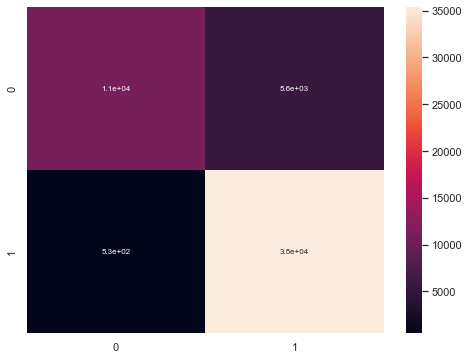

In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, annot_kws={"size": 8})
plt.show()